# Jon Williamson

# 425005368

# CSCE 421: Project Coach Tenure Models

## Preprocessing




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Reading the data:

In [2]:
df = pd.read_csv('master_data.csv', index_col=0)
df.head(5)

,Coach Name,Year,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Avg 2Y Win Pct,Coach Tenure Class
0,Aaron Kromer,2012,45,0,9,0,0,9,0,0,...,NaN,0.750000,0.354839,0.903226,0.935484,0.833333,1.0,0.5,0.333333,0
1,Abe Gibron,1972,47,0,0,0,0,12,0,0,...,NaN,0.428571,0.360000,0.260000,0.060000,0.166667,0.0,0.0,0.267857,1
2,Adam Gase,2016,38,0,0,0,0,5,3,0,...,NaN,0.437500,0.516129,0.338710,0.387097,0.166667,0.0,0.0,0.500000,1
3,Adam Gase,2019,41,1,0,0,0,5,3,3,...,0.462366,0.281250,0.225806,0.145161,0.112903,0.000000,0.0,0.0,0.218750,-1
4,Adam Walsh,1945,44,0,8,0,12,0,0,0,...,NaN,0.400000,0.600000,0.400000,0.400000,0.250000,0.0,0.0,0.745455,0


Because the feature names are complex, the stored data labels them only by feature number. The following table maps feature labels to descriptions of each feature.



<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Feature No.</th>
    <th class="tg-fymr">Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">1</td>
    <td class="tg-0pky">Age at hiring</td>
  </tr>
  <tr>
    <td class="tg-c3ow">2</td>
    <td class="tg-0pky">Number of times previously hired as head coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">3</td>
    <td class="tg-0pky">Number of years’ experience as college position coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">4</td>
    <td class="tg-0pky">Number of years’ experience as college coordinator</td>
  </tr>
  <tr>
    <td class="tg-c3ow">5</td>
    <td class="tg-0pky">Number of years’ experience as college head coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">6</td>
    <td class="tg-0pky">Number of years’ experience as NFL position coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">7</td>
    <td class="tg-0pky">Number of years’ experience as NFL coordinator</td>
  </tr>
  <tr>
    <td class="tg-c3ow">8</td>
    <td class="tg-0pky">Number of years’ experience as NFL head coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">9</td>
    <td class="tg-0pky">Demotion presence in hiring history</td>
  </tr>
  <tr>
    <td class="tg-c3ow">10</td>
    <td class="tg-0pky">During years as NFL OC, team’s average normalized yardage rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">11</td>
    <td class="tg-0pky">During years as NFL OC, team’s average normalized point rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">12</td>
    <td class="tg-0pky">During years as NFL OC, team’s average normalized giveaway rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">13</td>
    <td class="tg-0pky">During years as NFL DC, team’s average normalized yardage rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">14</td>
    <td class="tg-0pky">During years as NFL DC, team’s average normalized point rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">15</td>
    <td class="tg-0pky">During years as NFL DC, team’s average normalized turnover rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">16</td>
    <td class="tg-0pky">During years as NFL HC, team’s average normalized yardage differential rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">17</td>
    <td class="tg-0pky">During years as NFL HC, team’s average normalized point differential rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">18</td>
    <td class="tg-0pky">During years as NFL HC, team’s average normalized turnover ratio rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">19</td>
    <td class="tg-0pky">Hiring team’s average winning percentage in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">20</td>
    <td class="tg-0pky">Hiring team’s average normalized turnover ratio rank in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">21</td>
    <td class="tg-0pky">Hiring team’s average normalized point differential rank in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">22</td>
    <td class="tg-0pky">Hiring team’s average normalized yard differential rank in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">23</td>
    <td class="tg-0pky">Hiring team’s average divisional placement in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">24</td>
    <td class="tg-0pky">Hiring team’s number of playoff appearances in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">25</td>
    <td class="tg-0pky">Hiring team’s number of playoff wins in previous two years</td>
  </tr>
</tbody>
</table>

There are many key takeaways from this set of features. Firstly, the feature set will be sparse for a given data point because coaches are rarely an offensive coordinator and a defensive coordiantor prior to hiring. Secondly, features 10-18 and 20-23 were normalized based on the number of teams in the rank. Each of these features' original forms was of $x \text{ out of }z$, where $x$ is the rank of the attribute by team out of $z$ total teams. In order to convert this rank to a normalized value, the following equation was used:
$$
f(x,z) = \frac{z-x}{z-1}
$$
This equation linearly distributes score from 1 at the best rank to 0 at the worst rank. For example, a team that places 2nd out of 4 teams in their division is assigned the following score for a single instance of their divisional performance:
$$
f(2,4) = \frac{4-2}{4-1}\\
f(2,4) = \frac{2}{3}\\
f(2,4) \approx .667
$$
This normalization should roughly account for differences in play style over time because performance is always relative to other teams in the league at that time.

Prior to building the model, it is important to understand the distribution of data. The following code plots the distribution of average 2 year winning percentage for the entire data set.

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 6.5
plt.rc('axes', titlesize=18) 
plt.rc('axes', labelsize=18) 
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rcParams['font.family'] = "Times New Roman"

In [4]:
df = df[df['Coach Tenure Class'] != -1]
X = df.iloc[:,2:-2]
y = df.iloc[:,-1]
X.head(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25
0,45,0,9,0,0,9,0,0,0,NaN,...,NaN,NaN,NaN,0.750000,0.354839,0.903226,0.935484,0.833333,1.0,0.5
1,47,0,0,0,0,12,0,0,0,NaN,...,NaN,NaN,NaN,0.428571,0.360000,0.260000,0.060000,0.166667,0.0,0.0
2,38,0,0,0,0,5,3,0,0,0.752688,...,NaN,NaN,NaN,0.437500,0.516129,0.338710,0.387097,0.166667,0.0,0.0
4,44,0,8,0,12,0,0,0,0,NaN,...,NaN,NaN,NaN,0.400000,0.600000,0.400000,0.400000,0.250000,0.0,0.0
5,25,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
y.head(5)

0    0
1    1
2    1
4    0
5    0
Name: Coach Tenure Class, dtype: int64

The `create_data.py` file segments coach tenure into four classes as such:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Coach Hire Duration (Years)</th>
    <th class="tg-fymr">Class Label</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">1-2</td>
    <td class="tg-0pky">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">3-4</td>
    <td class="tg-0pky">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">5-7</td>
    <td class="tg-0pky">2</td>
  </tr>
  <tr>
    <td class="tg-c3ow">8+</td>
    <td class="tg-0pky">3</td>
  </tr>
</tbody>
</table>

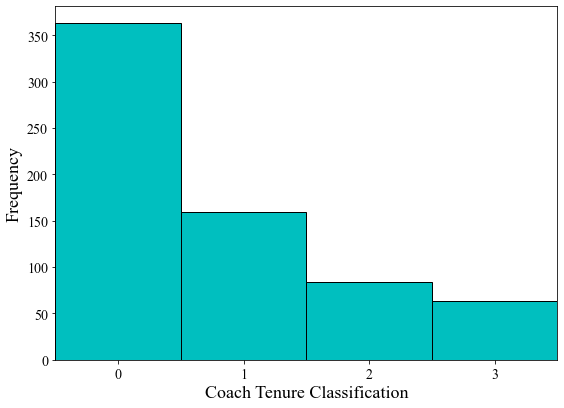

In [6]:
rcParams['figure.figsize'] = 9, 6.5
raw_coach_class = y.values.T
raw_coach_class_mean = np.mean(raw_coach_class)
plt.hist(raw_coach_class, bins=[-.5,.5,1.5,2.5,3.5], color='c', edgecolor='k')
plt.xlim(-0.5,3.5)
plt.xticks(ticks=[0,1,2,3])
plt.xlabel('Coach Tenure Classification')
plt.ylabel('Frequency')
plt.show()

The following code prints the correlation matrix for the features. This matrix shows that the data is not highly correlated. The 3x3 white boxes in the matrix show that the correlation between Features 10-12 and 13-15 have no correlation. This is expected, as Features 10-12 are based on performance as an offensive coordinator, while features 13-15 are from performance as a defensive coordinator. No coaches in the set were both an OC and a DC prior to being hired, hence there is no correlation value for those features. 

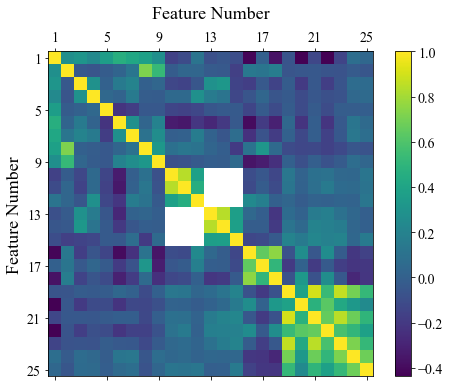

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.matshow(X.corr())
plt.xticks([0,4,8,12,16,20,24], labels=[1,5,9,13,17,21,25])
plt.yticks([0,4,8,12,16,20,24], labels=[1,5,9,13,17,21,25])
plt.ylabel('Feature Number')
plt.xlabel('Feature Number', labelpad=-370)

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)

plt.colorbar(cax=cax)
#plt.clim(-1, 1)
plt.show()

Holding out 20% of data for testing:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, shuffle=True, stratify=y, random_state=0)

## Model 1: Logistic Regression with Lasso Regularization

Necessary Imports:

In [9]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

The following code performs cross-validation to automatically detect hyperparameters to find the best model for each split. The `LassoCV` uses an internal 5-fold cross-validation to select the best $\alpha$ for regularization. The code runs an external 10-fold cross-validation to cross-validate the results. Note that there is still held out data from the original set. 

In [10]:
log_param_dict = {
    "C":     [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]
}

log_best_params_dict = {key: [] for key in log_param_dict.keys()}

log_result_dict = {     'train_score':  [],
                        'test_score':   [],
                        'coef_':        {
                            0: [],
                            1: [],
                            2: [],
                            3: []
                        }
}

num_of_folds    = 10
max_iter        = 1e6

default_log_params = {
    'verbose':      False,
    'penalty':      'l1',
    'solver':       'saga',
    'n_jobs':       1,
    'multi_class':  'multinomial',
    'max_iter':     max_iter
}

skf=StratifiedKFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(LogisticRegression(**default_log_params), param_grid=log_param_dict, n_jobs=-1, cv=5, verbose=1, scoring='roc_auc_ovr').fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        log_best_params_dict[key].append(value)
    best_model = model.best_estimator_
    log_result_dict['coef_'][0].append(best_model.coef_[0])
    log_result_dict['coef_'][1].append(best_model.coef_[1])
    log_result_dict['coef_'][2].append(best_model.coef_[2])
    log_result_dict['coef_'][3].append(best_model.coef_[3])

    log_result_dict['test_score'].append(roc_auc_score(y_test_, best_model.predict_proba(X_test__), average='macro', multi_class='ovr'))
    log_result_dict['train_score'].append(roc_auc_score(y_train_, best_model.predict_proba(X_train__), average='macro', multi_class='ovr'))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   12.7s finished
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    9.2s finished
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   10.1s finished
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    9.9s finished
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45

The following code prints the average AUROC value for each model on the train and test sets. Following this, the code plots a box plot for the absolute value of each coefficient for each class-specific regression. 

In [11]:
print('Average Train AUROC: {:.3f}\nAverage Test AUROC: {:.3f}'.format(np.mean(log_result_dict['train_score']), np.mean(log_result_dict['test_score'])))

Average Train AUROC: 0.706
Average Test AUROC: 0.620


The following code plots the feature importance weights for each class for the ovr in the training method. 

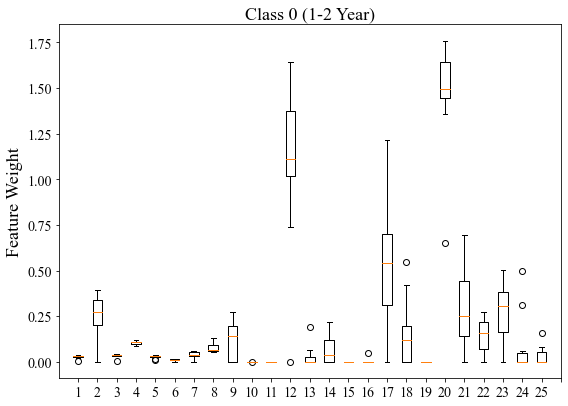

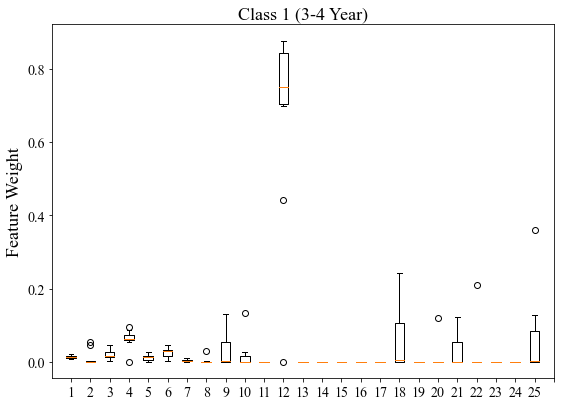

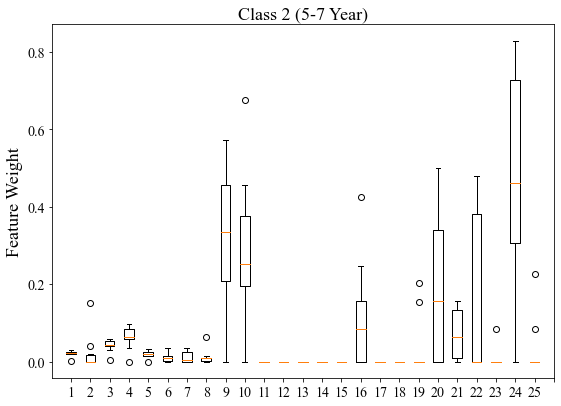

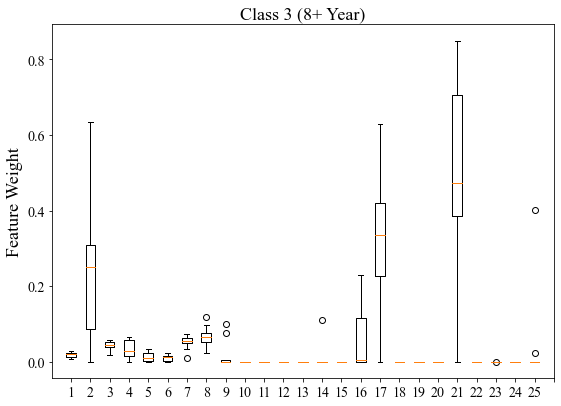

In [12]:
def plot_coef(coef_list_dict, title):
    coef_list = [np.abs(l) for l in zip(*coef_list_dict)]
    label_list = [item.split()[-1] for item in X.columns.values]
    label_list.append("")
    plt.boxplot(coef_list)
    plt.xlim(0, len(coef_list) + 1)
    plt.xticks(np.arange(1, len(label_list) + 1), labels=label_list)
    plt.ylabel('Feature Weight')
    plt.ylabel('Feature Weight')
    plt.title(title)
    plt.show()
    
plot_coef(log_result_dict['coef_'][0], 'Class 0 (1-2 Year)')
plot_coef(log_result_dict['coef_'][1], 'Class 1 (3-4 Year)')
plot_coef(log_result_dict['coef_'][2], 'Class 2 (5-7 Year)')
plot_coef(log_result_dict['coef_'][3], 'Class 3 (8+ Year)')

The following code prints the average (non-absolute) values for each ovr regression to compare feature importances across classes.

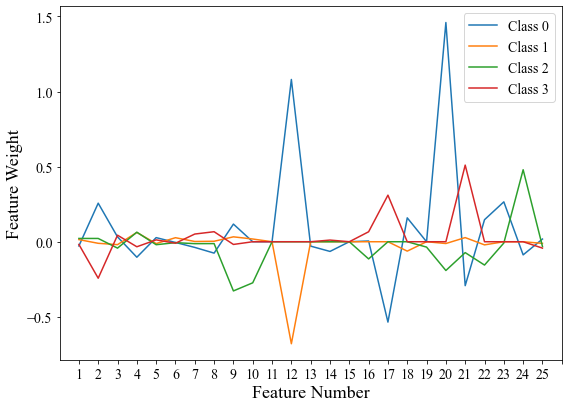

In [13]:
def plot_coefs(coef_list_dict_dict):
    count = 0
    for coef_list_dict in coef_list_dict_dict.values():
        coef_list = [np.mean(l) for l in zip(*coef_list_dict)]
        plt.plot(np.arange(1, len(coef_list) + 1), coef_list, label='Class {}'.format(count))
        count += 1
    label_list = [item.split()[-1] for item in X.columns.values]
    label_list.append("")
    plt.xlim(0, len(coef_list))
    plt.xticks(np.arange(1, len(label_list) + 1 ), labels=label_list)
    plt.ylabel('Feature Weight')
    plt.xlabel('Feature Number')
    #plt.ylim(-1,1)
    plt.legend()
    
plot_coefs(log_result_dict['coef_'])

In [14]:
feature_name_dict = {
    "Feature 1":    "Age at hiring",
    "Feature 2":    "Number of times previously hired as head coach",
    "Feature 3":    "Number of years’ experience as college position coach",
    "Feature 4":    "Number of years’ experience as college coordinator",
    "Feature 5":    "Number of years’ experience as college head coach",
    "Feature 6":    "Number of years’ experience as NFL position coach",
    "Feature 7":    "Number of years’ experience as NFL coordinator",
    "Feature 8":    "Number of years’ experience as NFL head coach",
    "Feature 9":    "Demotion presence in hiring history",
    "Feature 10":   "During years as NFL OC, team’s average normalized yardage rank",
    "Feature 11":   "During years as NFL OC, team’s average normalized point rank",
    "Feature 12":   "During years as NFL OC, team’s average normalized giveaway rank",
    "Feature 13":   "During years as NFL DC, team’s average normalized yardage rank",
    "Feature 14":   "During years as NFL DC, team’s average normalized point rank",
    "Feature 15":   "During years as NFL DC, team’s average normalized turnover rank",
    "Feature 16":   "During years as NFL HC, team’s average normalized yardage differential rank",
    "Feature 17":   "During years as NFL HC, team’s average normalized point differential rank",
    "Feature 18":   "During years as NFL HC, team’s average normalized turnover ratio rank",
    "Feature 19":   "Hiring team’s average winning percentage in previous two years",
    "Feature 20":   "Hiring team’s average normalized turnover ratio rank in previous two years",
    "Feature 21":   "Hiring team’s average normalized point differential rank in previous two years",
    "Feature 22":   "Hiring team’s average normalized yard differential rank in previous two years",
    "Feature 23":   "Hiring team’s average divisional placement in previous two years",
    "Feature 24":   "Hiring team’s number of playoff appearances in previous two years",
    "Feature 25":   "Hiring team’s number of playoff wins in previous two years"
}

The following code prints feature importance rankings for each class. 

In [15]:
def print_feature_importances(coef_list, label_list):
    feature_avg_weight_dict = dict(zip(label_list, [np.mean(np.abs(l)) for l in zip(*coef_list)]))
    feature_std_weight_dict = dict(zip(label_list, [np.std(np.abs(l)) for l in zip(*coef_list)]))
    feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
    count = 1
    for key, value in feature_avg_weight_dict.items():
        print('Rank {:>2}: {} ({}), has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, feature_name_dict[key], key, value, feature_std_weight_dict[key]))
        count += 1

In [16]:
print_feature_importances(log_result_dict['coef_'][0], X.columns.values)

Rank  1: Hiring team’s average normalized turnover ratio rank in previous two years (Feature 20), has an avg. importance of 1.4598 with a std. dev. of 0.2975.
Rank  2: During years as NFL OC, team’s average normalized giveaway rank (Feature 12), has an avg. importance of 1.0806 with a std. dev. of 0.4353.
Rank  3: During years as NFL HC, team’s average normalized point differential rank (Feature 17), has an avg. importance of 0.5352 with a std. dev. of 0.3453.
Rank  4: Hiring team’s average normalized point differential rank in previous two years (Feature 21), has an avg. importance of 0.2925 with a std. dev. of 0.2074.
Rank  5: Hiring team’s average divisional placement in previous two years (Feature 23), has an avg. importance of 0.2656 with a std. dev. of 0.1674.
Rank  6: Number of times previously hired as head coach (Feature 2), has an avg. importance of 0.2568 with a std. dev. of 0.1107.
Rank  7: During years as NFL HC, team’s average normalized turnover ratio rank (Feature 18), 

In [17]:
print_feature_importances(log_result_dict['coef_'][1], X.columns.values)

Rank  1: During years as NFL OC, team’s average normalized giveaway rank (Feature 12), has an avg. importance of 0.6793 with a std. dev. of 0.2566.
Rank  2: During years as NFL HC, team’s average normalized turnover ratio rank (Feature 18), has an avg. importance of 0.0625 with a std. dev. of 0.0950.
Rank  3: Number of years’ experience as college coordinator (Feature 4), has an avg. importance of 0.0619 with a std. dev. of 0.0241.
Rank  4: Hiring team’s number of playoff wins in previous two years (Feature 25), has an avg. importance of 0.0612 with a std. dev. of 0.1102.
Rank  5: Demotion presence in hiring history (Feature 9), has an avg. importance of 0.0327 with a std. dev. of 0.0457.
Rank  6: Hiring team’s average normalized point differential rank in previous two years (Feature 21), has an avg. importance of 0.0276 with a std. dev. of 0.0438.
Rank  7: Number of years’ experience as NFL position coach (Feature 6), has an avg. importance of 0.0269 with a std. dev. of 0.0132.
Rank  

In [18]:
print_feature_importances(log_result_dict['coef_'][2], X.columns.values)

Rank  1: Hiring team’s number of playoff appearances in previous two years (Feature 24), has an avg. importance of 0.4795 with a std. dev. of 0.2547.
Rank  2: Demotion presence in hiring history (Feature 9), has an avg. importance of 0.3275 with a std. dev. of 0.1687.
Rank  3: During years as NFL OC, team’s average normalized yardage rank (Feature 10), has an avg. importance of 0.2735 with a std. dev. of 0.1934.
Rank  4: Hiring team’s average normalized turnover ratio rank in previous two years (Feature 20), has an avg. importance of 0.1914 with a std. dev. of 0.1875.
Rank  5: Hiring team’s average normalized yard differential rank in previous two years (Feature 22), has an avg. importance of 0.1553 with a std. dev. of 0.2065.
Rank  6: During years as NFL HC, team’s average normalized yardage differential rank (Feature 16), has an avg. importance of 0.1144 with a std. dev. of 0.1317.
Rank  7: Hiring team’s average normalized point differential rank in previous two years (Feature 21), h

In [19]:
print_feature_importances(log_result_dict['coef_'][3], X.columns.values)

Rank  1: Hiring team’s average normalized point differential rank in previous two years (Feature 21), has an avg. importance of 0.5103 with a std. dev. of 0.2424.
Rank  2: During years as NFL HC, team’s average normalized point differential rank (Feature 17), has an avg. importance of 0.3102 with a std. dev. of 0.1906.
Rank  3: Number of times previously hired as head coach (Feature 2), has an avg. importance of 0.2429 with a std. dev. of 0.1863.
Rank  4: Number of years’ experience as NFL head coach (Feature 8), has an avg. importance of 0.0667 with a std. dev. of 0.0264.
Rank  5: During years as NFL HC, team’s average normalized yardage differential rank (Feature 16), has an avg. importance of 0.0664 with a std. dev. of 0.0888.
Rank  6: Number of years’ experience as NFL coordinator (Feature 7), has an avg. importance of 0.0512 with a std. dev. of 0.0175.
Rank  7: Number of years’ experience as college position coach (Feature 3), has an avg. importance of 0.0436 with a std. dev. of 0

The following code predicts the classes for the held out test set and displays the results. 

In [20]:
from scipy.stats import mode
plot_pred = None
model = None
X_test__ = None
# Loop only exists to limit variable scope.
for i in [1]:
    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train)
    X_test__       = mean_imputer.transform(X_test)
    #model = LogisticRegression(C=np.mean(log_best_params_dict['C'])).fit(X_train__, y_train)
    print(np.mean(log_best_params_dict['C']))
    model = LogisticRegression(C=mode(log_best_params_dict['C'])[0][0]).fit(X_train__, y_train)

    plot_pred = model.predict(X_test__)

0.9099999999999999


In [21]:
log_best_params_dict

{'C': [1, 1, 0.1, 1, 1, 1, 1, 1, 1, 1]}

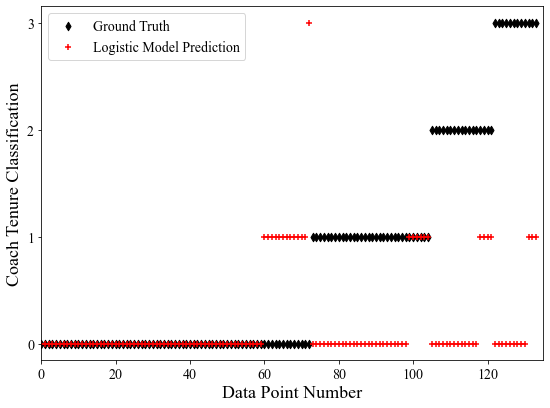

In [22]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(0, len(sorted_y_test)), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(0, len(sorted_plot_pred)), sorted_plot_pred, marker='+', color='r', label='Logistic Model Prediction')
plt.xlabel('Data Point Number')
plt.ylabel('Coach Tenure Classification')
plt.yticks([0,1,2,3], labels=[0,1,2,3])
plt.xlim(0, len(sorted_plot_pred) + 1)
plt.legend()
plt.show()

In [23]:
print('AUROC: {:.3f}'.format(roc_auc_score(y_test, best_model.predict_proba(X_test__), average='macro', multi_class='ovr')))
print('AUROC When always preidcting class 0: {:.3f}'.format(roc_auc_score(y_test, [[1,0,0,0]] * len(X_test__), average='macro', multi_class='ovr')))

AUROC: 0.593
AUROC When always preidcting class 0: 0.500


These results show that the regularized logistic regression tends to predict class 0, the most frequent class, at a disproportionate rate. Nonetheless, the model does have a suurprisingly high weighted AUROC of .605. The AUROC when always predicting class 0 is .500, showing that the logistic regression does provide useful differentiation and adds value to tenure prediction.

## Model 2: XGBoost Classifier

Necessary Imports:

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

As before, we will implement the model with external cross-validation. Because xgboost does not have internal cross validation to choose hyperparameters, it is necessary to implement hyperparameter cross-validation via `GridSearchCV`.

In [25]:

xgbr_param_dict = {
    "n_estimators":     [10, 25, 50, 100, 200],
    "learning_rate":    [.01, .05, .1, .2],
    "max_depth":        [2, 4, 6, 8, 10],
    "gamma":            [0, .001, .01, .1],
    "reg_lambda":       [0, .01, .1]
}
"""
xgbr_param_dict = {
    "n_estimators":     [5, 10, 20],
    "learning_rate":    [.1, .5],
}
"""
xgbr_best_params_dict = {key: [] for key in xgbr_param_dict.keys()}

xgbr_result_dict = {    'train_score':  [],
                        'test_score':   [],
                        'importance':   []
}
default_xgbr_params = {
    'verbosity':    1,
    'objective':    'multi:softprob',
    'n_jobs':       1
}

num_of_folds=10

skf=StratifiedKFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(XGBClassifier(**default_xgbr_params), param_grid=xgbr_param_dict, scoring='roc_auc_ovr', n_jobs=-1, cv=5, verbose=1).fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        xgbr_best_params_dict[key].append(value)
    best_model = model.best_estimator_
    xgbr_result_dict['importance'].append(best_model.feature_importances_)

    tr_pred = best_model.predict_proba(X_train__)
    te_pred  = best_model.predict_proba(X_test__)

    xgbr_result_dict['test_score'].append(roc_auc_score(y_test_, te_pred, average='macro', multi_class='ovr'))
    xgbr_result_dict['train_score'].append(roc_auc_score(y_train_, tr_pred, average='macro', multi_class='ovr'))

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  8.4min finished
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=

In [26]:
print('Average Train AUROC: {:.3f}\nAverage Test AUROC: {:.3f}'.format(np.mean(xgbr_result_dict['train_score']), np.mean(xgbr_result_dict['test_score'])))

Average Train AUROC: 0.972
Average Test AUROC: 0.671


In [27]:
xgbr_best_params_dict

{'n_estimators': [25, 200, 100, 50, 200, 200, 200, 100, 50, 50],
 'learning_rate': [0.2, 0.1, 0.1, 0.05, 0.2, 0.1, 0.2, 0.05, 0.05, 0.1],
 'max_depth': [10, 10, 10, 2, 10, 10, 10, 8, 2, 8],
 'gamma': [0, 0.01, 0.1, 0, 0.001, 0.1, 0, 0.001, 0, 0.1],
 'reg_lambda': [0, 0.1, 0.01, 0.1, 0.01, 0, 0, 0.01, 0.1, 0.01]}

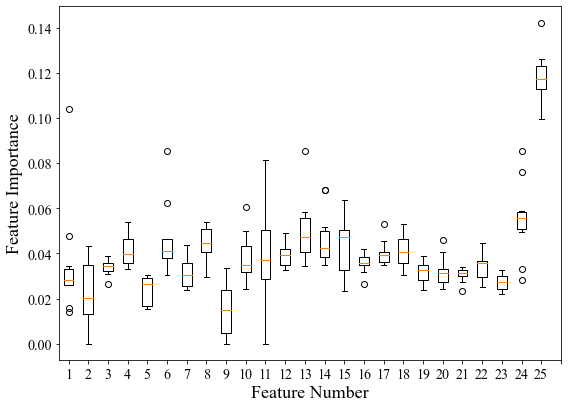

In [28]:
xgbr_coef_list = [np.abs(l) for l in zip(*xgbr_result_dict['importance'])]
xgbr_label_list = [item.split()[-1] for item in X.columns.values]
xgbr_label_list.append("")
plt.boxplot(xgbr_coef_list)
plt.xticks(np.arange(1, len(xgbr_label_list) + 1), labels=xgbr_label_list)
plt.ylabel('Feature Importance')
plt.xlabel('Feature Number')
plt.show()

In [29]:
print_feature_importances(xgbr_result_dict['importance'], X.columns.values)

Rank  1: Hiring team’s number of playoff wins in previous two years (Feature 25), has an avg. importance of 0.1185 with a std. dev. of 0.0109.
Rank  2: Hiring team’s number of playoff appearances in previous two years (Feature 24), has an avg. importance of 0.0554 with a std. dev. of 0.0161.
Rank  3: During years as NFL DC, team’s average normalized yardage rank (Feature 13), has an avg. importance of 0.0503 with a std. dev. of 0.0143.
Rank  4: During years as NFL DC, team’s average normalized point rank (Feature 14), has an avg. importance of 0.0466 with a std. dev. of 0.0117.
Rank  5: Number of years’ experience as NFL position coach (Feature 6), has an avg. importance of 0.0464 with a std. dev. of 0.0153.
Rank  6: Number of years’ experience as NFL head coach (Feature 8), has an avg. importance of 0.0448 with a std. dev. of 0.0073.
Rank  7: During years as NFL DC, team’s average normalized turnover rank (Feature 15), has an avg. importance of 0.0437 with a std. dev. of 0.0131.
Rank 

The previously printed RMSE values show that the heavily cross-validated XGBoost has a better performance on both the testing and training sets within the cross validation. The performance on the test sets is quite remarkable at .909. This value is notable because the model was built using `GridSearchCV` with internal cross-validation. These results show that the model was able to create some generalizable functionality. Before moving on to the next model, let's visualize the predictions of a model with the best average parameters on the held out test set.

In [30]:
plot_pred = None
xgbr = None
X_test__ = None
# Loop only exists to limit variable scope.
for i in [1]:
    test_xgbr_best_params_dict = {key: max(set(value), key=value.count) for (key, value) in xgbr_best_params_dict.items()}
    test_xgbr_best_params_dict.update(default_xgbr_params)
    print(test_xgbr_best_params_dict)
    mean_imputer   = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train)
    X_test__       = mean_imputer.transform(X_test)
    xgbr = XGBClassifier(**test_xgbr_best_params_dict).fit(X_train__, y_train)
    plot_pred = xgbr.predict(X_test__)

{'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 10, 'gamma': 0, 'reg_lambda': 0.01, 'verbosity': 1, 'objective': 'multi:softprob', 'n_jobs': 1}


In [31]:
xgbr.save_model('XGBC_best_params')

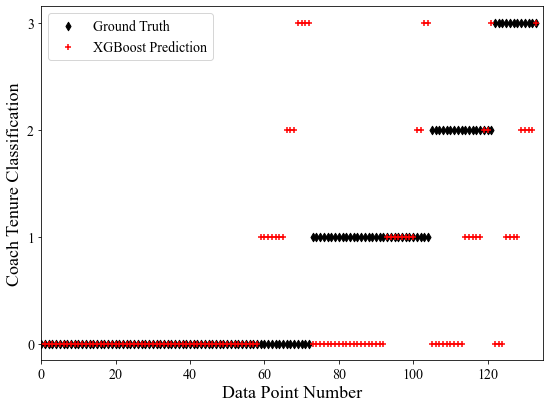

In [32]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(0, len(sorted_y_test)), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(0, len(sorted_plot_pred)), sorted_plot_pred, marker='+', color='r', label='XGBoost Prediction')
plt.xlabel('Data Point Number')
plt.ylabel('Coach Tenure Classification')
plt.yticks([0,1,2,3], labels=[0,1,2,3])
plt.xlim(0, len(sorted_plot_pred) + 1)
plt.legend()
plt.show()

In [33]:
print('Average AUROC: {:.3f}'.format(roc_auc_score(y_test, xgbr.predict_proba(X_test__), average='macro', multi_class='ovr')))

Average AUROC: 0.669


The previous plot shows that the XGBoost model has an impressive AUROC of .706. This is better than the logistic regression model, which had an AUROC of .605 on the same held-out test set. These test results show some promise of predicitive value.

In [34]:
def print_predictions(mod, arr, tenure_list):
    integer_lookup_list = []
    count = 0
    probas = mod.predict_proba(arr)
    for tenure in mod.predict(arr):
        if tenure in tenure_list:
            integer_lookup_list.append((count, probas[count]))  
        count += 1
    return integer_lookup_list

## Model 3: MLPClassifier

Necessary Imports:

In [35]:
from sklearn.neural_network import MLPClassifier

In [36]:

mlpc_param_dict = {
    "alpha":            [0, .0001, .001, .01],
    "tol":              [1e-4, 1e-5],
    "max_iter":         [200, 300, 400, 500]
    #"hidden_layer_sizes":   [(100,), (50, 25,), (50, 25, 15, 9,), (100, 100, 50, 50,),]
}
"""
mlpc_param_dict = {
    "activation":       ['relu', 'tanh'],
    "alpha":            [0, .0001, .001]
}
"""
mlpc_best_params_dict = {key: [] for key in mlpc_param_dict.keys()}

mlpc_result_dict = {    'train_score':  [],
                        'test_score':   [],
                        'importance':   []
}

default_mlpc_params = {
    'solver':       'lbfgs',
    "activation":   'relu'
}

num_of_folds=10

skf=StratifiedKFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(MLPClassifier(**default_mlpc_params), param_grid=mlpc_param_dict, scoring='roc_auc_ovr', n_jobs=-1, cv=5, verbose=1).fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        mlpc_best_params_dict[key].append(value)
    best_model = model.best_estimator_

    tr_pred = best_model.predict_proba(X_train__)
    te_pred  = best_model.predict_proba(X_test__)

    mlpc_result_dict['test_score'].append(roc_auc_score(y_test_, te_pred, average='macro', multi_class='ovr'))
    mlpc_result_dict['train_score'].append(roc_auc_score(y_train_, tr_pred, average='macro', multi_class='ovr'))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   27.5s finished
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   27.3s finished
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   27.6s finished
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | 

In [37]:
print('Average Train AUROC: {:.3f}\nAverage Test AUROC: {:.3f}'.format(np.mean(mlpc_result_dict['train_score']), np.mean(mlpc_result_dict['test_score'])))

Average Train AUROC: 0.787
Average Test AUROC: 0.638


In [38]:
test_mlpc_best_params_dict = {key: max(set(value), key=value.count) for (key, value) in mlpc_best_params_dict.items()}
print(test_mlpc_best_params_dict)
test_mlpc_best_params_dict.update(default_mlpc_params)
mean_imputer    = SimpleImputer()
imputed_X_train = mean_imputer.fit_transform(X_train)
imputed_X_test  = mean_imputer.transform(X_test)
mlpc = MLPClassifier(**test_mlpc_best_params_dict).fit(imputed_X_train, y_train)
plot_pred = mlpc.predict(imputed_X_test)

{'alpha': 0, 'tol': 0.0001, 'max_iter': 200}


In [39]:
mlpc_best_params_dict

{'alpha': [0, 0.001, 0, 0, 0.01, 0, 0.001, 0.0001, 0.0001, 0.001],
 'tol': [0.0001,
  1e-05,
  0.0001,
  0.0001,
  0.0001,
  0.0001,
  1e-05,
  0.0001,
  1e-05,
  0.0001],
 'max_iter': [300, 200, 200, 200, 200, 300, 200, 200, 200, 500]}

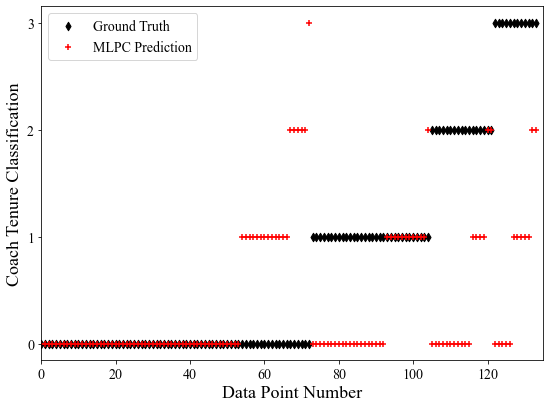

In [40]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(0, len(sorted_y_test)), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(0, len(sorted_plot_pred)), sorted_plot_pred, marker='+', color='r', label='MLPC Prediction')
plt.xlabel('Data Point Number')
plt.ylabel('Coach Tenure Classification')
plt.yticks([0,1,2,3], labels=[0,1,2,3])
plt.xlim(0, len(sorted_plot_pred) + 1)
plt.legend()
plt.show()

In [41]:
print('Average AUROC: {:.3f}'.format(roc_auc_score(y_test, mlpc.predict_proba(imputed_X_test), average='macro', multi_class='ovr')))

Average AUROC: 0.621


In [42]:
for index, probas in print_predictions(xgbr, imputed_X_test, [1]):
    print('{:<22} {:>4} {:>2} {}'.format(df.loc[X_test.iloc[index].name]['Coach Name'], df.loc[X_test.iloc[index].name]['Year'], df.loc[X_test.iloc[index].name]['Coach Tenure Class'], probas))

Mike Singletary        2009  0 [7.5605223e-03 9.9155688e-01 6.3659326e-04 2.4595106e-04]
Mac Speedie            1964  1 [0.3560399  0.5820133  0.04973254 0.01221424]
Weeb Ewbank            1963  3 [0.24273357 0.73702943 0.00302085 0.01721612]
Tom Coughlin           1995  3 [0.07382972 0.59440535 0.00476089 0.32700402]
Bill Parcells          1993  1 [0.02876527 0.8589907  0.01240969 0.09983428]
Tony Dungy             1996  2 [0.18031402 0.43333724 0.01720764 0.36914113]
Harvey Johnson         1968  1 [0.1500766  0.8411427  0.00669797 0.00208269]
Romeo Crennel          2005  1 [0.17695321 0.80248487 0.00241218 0.01814972]
Harland Svare          1962  1 [0.03680282 0.68217355 0.2530331  0.02799046]
Wally Lemm             1966  2 [0.12902199 0.62642765 0.09316149 0.15138887]
Mike Tomlin            2007  3 [0.03339712 0.7641742  0.01591175 0.18651688]
Bill Austin            1966  1 [0.021028   0.97471386 0.00229433 0.00196376]
Mike Martz             2000  2 [0.03661354 0.8406736  0.10592382

In [43]:
for index, probas in print_predictions(xgbr, imputed_X_test, [2, 3]):
    print('{:<22} {:>4} {:>2} {}'.format(df.loc[X_test.iloc[index].name]['Coach Name'], df.loc[X_test.iloc[index].name]['Year'], df.loc[X_test.iloc[index].name]['Coach Tenure Class'], probas))

Mike Holovak           1961  3 [0.04216879 0.00578906 0.95050395 0.00153823]
Jim Leonard            1945  0 [0.1302494  0.03064115 0.7596382  0.07947126]
Richard Williamson     1990  0 [0.24003132 0.11639758 0.63249564 0.01107544]
Sid Gillman            1973  0 [0.07022324 0.20791349 0.07621769 0.6456456 ]
John McVay             1976  1 [0.14029251 0.19028339 0.5575294  0.11189476]
Jerry Glanville        1986  1 [0.01554453 0.11233442 0.01054306 0.86157805]
Eddie Erdelatz         1960  0 [0.3438507  0.23817083 0.00857211 0.40940636]
Bobby Ross             1997  1 [0.3735401  0.04108015 0.01076224 0.5746175 ]
Dick Nolan             1968  3 [0.01410167 0.09126014 0.8755528  0.01908545]
Buster Ramsey          1960  0 [0.27190867 0.1564308  0.00598695 0.5656736 ]
Bum Phillips           1975  2 [0.01872429 0.17965335 0.7987009  0.00292148]
Tom Landry             1960  3 [0.00214823 0.01048142 0.00727871 0.98009163]
Dave Campo             2000  1 [0.10998119 0.11262725 0.60509175 0.17229985]

As with previous models, MLP does not have a standard, quick way to understand feature importances. In order to combat this, we use LIME to estimate feature importances over the entire test set via data perturbation. The following code shows one example of an estimate for a random point in the test set. The display shows which features matter, in a positive and negative manner.

In [44]:
for index, probas in print_predictions(mlpc, imputed_X_test, [2, 3]):
    print('{:<22} {:>4} {:>2} {}'.format(df.loc[X_test.iloc[index].name]['Coach Name'], df.loc[X_test.iloc[index].name]['Year'], df.loc[X_test.iloc[index].name]['Coach Tenure Class'], probas))

Richie Petitbon        1993  0 [0.21718661 0.28883459 0.30372615 0.19025266]
Weeb Ewbank            1963  3 [0.09615054 0.30401123 0.3565151  0.24332313]
Joe Walton             1983  2 [0.14843648 0.25751542 0.29939166 0.29465643]
Sid Gillman            1973  0 [0.03882529 0.03954358 0.36124652 0.56038462]
Marc Trestman          2013  0 [0.22086446 0.2783162  0.32071716 0.18010219]
Mike Martz             2000  2 [0.29938763 0.16161988 0.50070971 0.03828278]
Bobby Ross             1997  1 [0.11595151 0.1486743  0.37504436 0.36032983]
John Harbaugh          2008  3 [0.22578516 0.27389231 0.47151767 0.02880485]
Hank Stram             1976  0 [0.15248883 0.09431957 0.455687   0.2975046 ]
Jim Zorn               2008  0 [0.30937341 0.13457296 0.50967984 0.04637379]
Hue Jackson            2011  0 [0.34655863 0.20550578 0.37599599 0.0719396 ]


In [45]:
import lime
import lime.lime_tabular

In [46]:
explainer = lime.lime_tabular.LimeTabularExplainer(imputed_X_train, 
                                                   feature_names=list(X.columns.values), 
                                                   verbose=False, mode='regression')
random_index = np.random.randint(0, len(imputed_X_test))
exp = explainer.explain_instance(imputed_X_test[i], mlpc.predict)
exp.show_in_notebook(show_table=True)

In [47]:
mlpc_importance_dict = {key: [] for key in feature_name_dict.keys() }

for i in np.arange(0, len(imputed_X_test)):
    print('Estimating feature importance for point {}'.format(i + 1))
    exp = explainer.explain_instance(imputed_X_test[i], mlpc.predict)
    for tuple_ in exp.as_list():
        label, weight = tuple_
        start_index = label.find('Feature')
        feature = label[start_index:start_index + 10].strip()
        mlpc_importance_dict[feature].append(float(weight))

Estimating feature importance for point 1
Estimating feature importance for point 2
Estimating feature importance for point 3
Estimating feature importance for point 4
Estimating feature importance for point 5
Estimating feature importance for point 6
Estimating feature importance for point 7
Estimating feature importance for point 8
Estimating feature importance for point 9
Estimating feature importance for point 10
Estimating feature importance for point 11
Estimating feature importance for point 12
Estimating feature importance for point 13
Estimating feature importance for point 14
Estimating feature importance for point 15
Estimating feature importance for point 16
Estimating feature importance for point 17
Estimating feature importance for point 18
Estimating feature importance for point 19
Estimating feature importance for point 20
Estimating feature importance for point 21
Estimating feature importance for point 22
Estimating feature importance for point 23
Estimating feature i

In [48]:
mlpc_coef_list = [l for l in mlpc_importance_dict.values()]

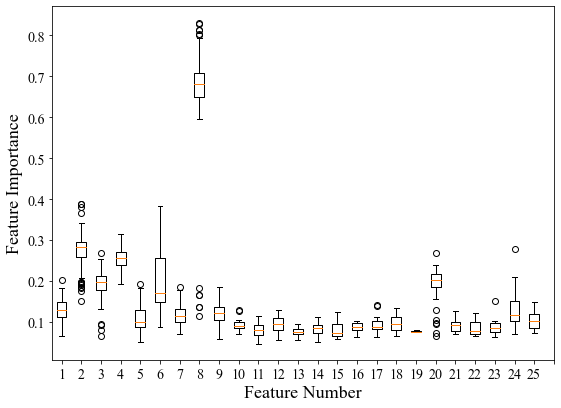

In [49]:
mlpc_coef_list  = [np.abs(l) if l != [] else 0 for l in mlpc_importance_dict.values()]
mlpc_label_list = [item.split()[-1] for item in X.columns.values]
mlpc_label_list.append("")
plt.boxplot(mlpc_coef_list)
plt.xticks(np.arange(1, len(xgbr_label_list) + 1), labels=mlpc_label_list)
plt.ylabel('Feature Importance')
plt.xlabel('Feature Number')
plt.show()

In [50]:
feature_avg_weight_dict = dict(zip(mlpc_label_list[0:-1], [np.mean(l) for l in zip(mlpc_coef_list)]))
feature_std_weight_dict = dict(zip(mlpc_label_list[0:-1], [np.std(l) for l in zip(mlpc_coef_list)]))
feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
count = 1
for key, value in feature_avg_weight_dict.items():
    print('Rank {:>2}: {} ({}), has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, feature_name_dict['Feature ' + str(key)], key, value, feature_std_weight_dict[str(key)]))
    count += 1

Rank  1: Number of years’ experience as NFL head coach (8), has an avg. importance of 0.6672 with a std. dev. of 0.1229.
Rank  2: Number of times previously hired as head coach (2), has an avg. importance of 0.2754 with a std. dev. of 0.0399.
Rank  3: Number of years’ experience as college coordinator (4), has an avg. importance of 0.2555 with a std. dev. of 0.0233.
Rank  4: Number of years’ experience as NFL position coach (6), has an avg. importance of 0.1986 with a std. dev. of 0.0712.
Rank  5: Hiring team’s average normalized turnover ratio rank in previous two years (20), has an avg. importance of 0.1965 with a std. dev. of 0.0350.
Rank  6: Number of years’ experience as college position coach (3), has an avg. importance of 0.1928 with a std. dev. of 0.0301.
Rank  7: Age at hiring (1), has an avg. importance of 0.1298 with a std. dev. of 0.0282.
Rank  8: Hiring team’s number of playoff appearances in previous two years (24), has an avg. importance of 0.1287 with a std. dev. of 0.0

The Neural Network performs moderatley worse than XGBoost on the held out test set, and performs better than the logistic regression. These results show valuable insight that these models may be able to provide predictive value in head coach hiring decisions in the NFL. The MLP feature importance weights differ greatly from the previous models.